In [1]:
import csv
import xml.etree.ElementTree as ET
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys, os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *

from data_manager import *
from metadata import *

Setting environment for Local Macbook Pro


In [2]:
from annotation_utilities import *
from registration_utilities import *
from conversion import *

In [3]:
# stack = 'LM40'
# xmlfile = ROOT_DIR + '/lauren_data/%s_export.xml' % stack
# stack = 'LM30'
# xmlfile = ROOT_DIR + '/lauren_data/%s_export.xml' % stack
# stack = 'LM40new'
# xmlfile = ROOT_DIR + '/lauren_data/LM40_new.xml'
# stack = 'LM30new'
# xmlfile = ROOT_DIR + '/lauren_data/LM30_new.xml'
# stack = 'LM31'
# xmlfile = ROOT_DIR + '/lauren_data/LM31_FINAL.xml'
# stack = 'LM38'
# xmlfile = ROOT_DIR + '/lauren_data/LM38_FINAL_FLIP_L.xml' # fixed orientation to be the same as others
# stack = 'LM48'
# xmlfile = ROOT_DIR + '/lauren_data/LM48_FINAL.xml'

# stack = 'LM42_LM37'
# xmlfile = ROOT_DIR + '/lauren_data/LM42_LM37_FINAL.xml'
# stack = 'LM46'
# xmlfile = ROOT_DIR + '/lauren_data/LM46_FINAL.xml'
# stack = 'LM22'
# xmlfile = ROOT_DIR + '/lauren_data/LM22_FINAL.xml'
# stack = 'LM41'
# xmlfile = ROOT_DIR + '/lauren_data/LM41_Final.xml'
# stack = 'LM86'
# xmlfile = ROOT_DIR + '/lauren_data/LM86_FINAL_3D_SNr.xml'
# stack = 'LM84'
# xmlfile = ROOT_DIR + '/lauren_data/LM84_FINAL.xml'
# stack = 'LM32'
# xmlfile = ROOT_DIR + '/lauren_data/LM32_FINAL.xml'
# stack = 'LM72'
# xmlfile = ROOT_DIR + '/lauren_data/LM72_3D_SNrl_FINAL_scaled.xml'

stack = 'LM27'
xmlfile = ROOT_DIR + '/lauren_data/LSC_LM27_3D_FINAL.xml'
# stack = 'LM17'
# xmlfile = ROOT_DIR + '/lauren_data/CSC_LM17_3D_FINAL.xml'
# stack = 'LM37'
# xmlfile = ROOT_DIR + '/lauren_data/mSC_LM37_3D_FINAL.xml'
# stack = 'LM95'
# xmlfile = ROOT_DIR + '/lauren_data/mSC_LM95_FINAL.xml'
# stack = 'LM54'
# xmlfile = ROOT_DIR + '/lauren_data/DR_LM54_FINAL.xml'
# stack = 'LM51'
# xmlfile = ROOT_DIR + '/lauren_data/PPN_LM51_FINAL_NEW.xml'
# stack = 'LM45'
# xmlfile = ROOT_DIR + '/lauren_data/PPN_LM45_FINAL_NEW.xml'
# stack = 'LM97_LM98'
# xmlfile = ROOT_DIR + '/lauren_data/VM_LM97_98_MERGE_FINAL_2.xml'
# stack = 'LM94_LM96_LM25'
# xmlfile = ROOT_DIR + '/lauren_data/DR_LM94_96_25_MERGE_FINAL2.xml'

download_from_s3(xmlfile)

In [7]:
# create element tree object
tree = ET.parse(xmlfile)

# get root element
root = tree.getroot()

prefix = '{http://www.mbfbioscience.com/2007/neurolucida}'

# Lauren data
neurolucida_name_map = \
{"Contour Name 1": 'RMC_L',
"Contour Name 2": '3N_L',
# "Contour Name 3": 'fr',
'Brain': 'outline',
 'Brain Outline': 'outline',
 '3N': '3N_L',
 'RN': 'RMC_L',
 'RedNuc': 'RMC_L',
 'SNR': 'SNR_L'}

In [8]:
contours = defaultdict(list)

for item in root.findall(prefix+'contour'):
    name = item.attrib['name']
    if name not in neurolucida_name_map:
#         raise Exception('Name %s in stack %s not recognized' % (name, stack))
        sys.stderr.write('Name %s in stack %s not recognized. Ignored.\n' % (name, stack))
        continue
    name = neurolucida_name_map[name]
    curr_contour = []
#     try:
#         resolution = float(item.findall(prefix+'resolution')[0].text)
#         print resolution
#     except:
#         pass
    for p in item.findall(prefix+'point'):
        curr_contour.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
    contours[name].append(np.array(curr_contour))
    
contours.default_factory = None

Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.
Name fr in stack LM27 not recognized. Ignored.


In [17]:
# markers = defaultdict(list)
markers = {}
# name = 'SNR'
name = 'All'

for item in root.findall(prefix+'marker'):
    curr_markers = []
    for p in item.findall(prefix+'point'):
        curr_markers.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
    markers[name] = np.array(curr_markers)
    
# markers.default_factory = None

In [10]:
markers

{'All': array([[-23665.86,   3557.04,    240.  ],
        [-23699.04,   3490.4 ,    240.  ],
        [-23546.15,   3440.54,    240.  ],
        ..., 
        [-23669.52,   3949.95,   1171.  ],
        [-23706.43,   3987.18,   1171.  ],
        [-23787.29,   4069.08,   1171.  ]])}

In [11]:
contour_colors = dict(zip(contours.keys(), np.array(random_colors(len(contours)))/255.))

In [12]:
marker_colors = dict(zip(markers.keys(), np.array(random_colors(len(markers)))/255.))

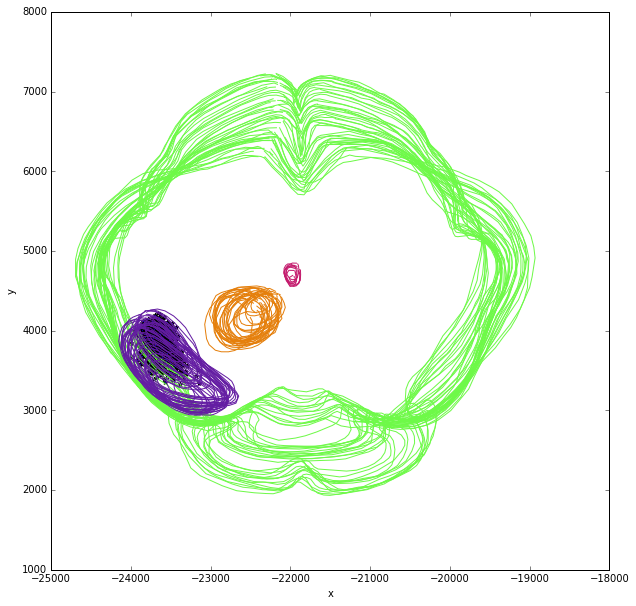

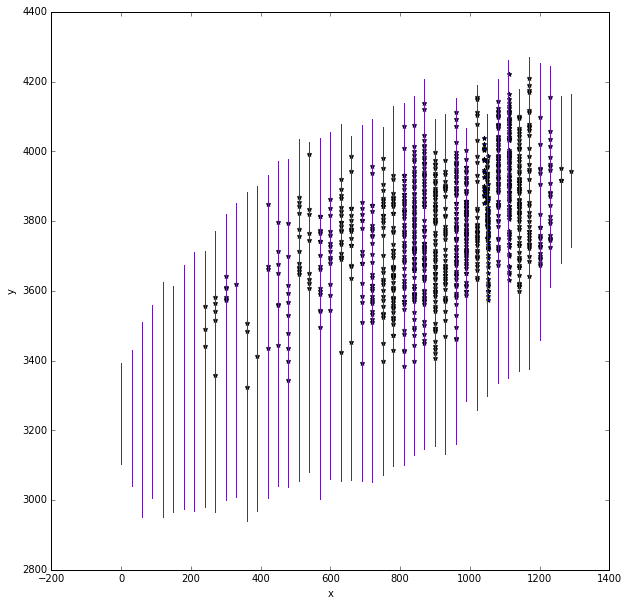

In [18]:
# plt.figure(figsize=(10, 10));

# for name, cnts in contours.iteritems():    
# #     print name
# #     if parse_label(name)[1] == 'L' and \
# #     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
# #     if parse_label(name)[0] == '7N':
#     for cnt in cnts:
#         plt.plot(cnt[:, 2], cnt[:, 1], c=contour_colors[name]);
# plt.axis('equal');
# plt.xlabel('x');
# plt.ylabel('z');

##############################
            
plt.figure(figsize=(10, 10));
for name, cnts in contours.iteritems():    
#     if parse_label(name)[1] == 'L' and \
#     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
#     if parse_label(name)[0] == '7N':
    for cnt in cnts:
        plt.plot(cnt[:, 0], cnt[:, 1], c=contour_colors[name]);
    
# plt.scatter(markers['SNR'][:,0], markers['SNR'][:,1], s=20, marker='*')
plt.scatter(markers['All'][:,0], markers['All'][:,1], s=20, marker='*')

# for name, mkrs in markers.iteritems():
#     plt.scatter(mkrs[:, 0], mkrs[:, 1], c=marker_colors[name], s=1, zorder=9);

plt.xlabel('x');
plt.ylabel('y');
plt.axis('equal');
# plt.legend();

##############################

plt.figure(figsize=(10, 10));
for name, cnts in contours.iteritems():    
#     if parse_label(name)[1] == 'L' and \
#     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
#     if parse_label(name)[0] == '7N':
    if name == 'SNR_L':
        for cnt in cnts:
            plt.plot(cnt[:, 2], cnt[:, 1], c=contour_colors[name]);
    
plt.scatter(markers['All'][:,2], markers['All'][:,1], s=20, marker='*')

# for name, mkrs in markers.iteritems():
#     plt.scatter(mkrs[:, 0], mkrs[:, 1], c=marker_colors[name], s=1, zorder=9);

plt.xlabel('x');
plt.ylabel('y');
plt.axis('equal');
# plt.legend();

In [29]:
# contour coordinates are in um already.

In [19]:
structure_subset = \
[name for name in contours.keys() if parse_label(name)[0] in all_known_structures]
print structure_subset

['RMC_L', '3N_L', 'SNR_L']


In [33]:
out_resolution = '10.0um'

In [20]:
# downscale = 32

Lauren's data; coronal; 
x=left to right; y= superior to inferior (wrong! should be inferior to superior); z= anterior to posterior (they are coronal sections).

In [34]:
markers_orientationCorrected = {convert_to_left_name(name_u): mkrs3d[:, [2,1,0]]*[1,-1,1]
                       for name_u, mkrs3d in markers.iteritems()}

# markers_atlasResol = {name: mkrs3d / (XY_PIXEL_DISTANCE_LOSSLESS * downscale)
markers_atlasResol = {name: mkrs3d / convert_resolution_string_to_um(resolution=out_resolution)
                       for name, mkrs3d in markers_orientationCorrected.iteritems()
                     if name in structure_subset}

In [35]:
contours_orientationCorrected = {convert_to_left_name(name_u): [cnt[:, [2,1,0]]*[1,-1,1]
                                 for cnt in cnts3d] 
                       for name_u, cnts3d in contours.iteritems()}

contours_atlasResol = {name: [cnt / convert_resolution_string_to_um(resolution=out_resolution)
                                for cnt in cnts3d if len(cnt) > 3] 
                       for name, cnts3d in contours_orientationCorrected.iteritems()
                                            if name in structure_subset}

# Convert contours to volumes

In [37]:
valid_level = .5

surround_distance_um = 200
surround_distance_voxel = surround_distance_um / convert_resolution_string_to_um(resolution=out_resolution)
print "surround size (in voxels):", surround_distance_voxel

surround size (in voxels): 20.0


In [38]:
vol_bbox_dict = {}
for name, cnts3d in contours_atlasResol.iteritems():
    vol_bbox_dict[name] = interpolate_contours_to_volume(interpolation_direction='x',
                                                    contours_xyz=cnts3d, 
                                                    len_interval=20)

    surr_name = convert_to_surround_name(name, margin=surround_distance_um)    
    vol_bbox_dict[surr_name] = get_surround_volume_v2(vol_bbox_dict[name][0], vol_bbox_dict[name][1], 
                                                      valid_level=valid_level, distance=surround_distance_voxel, 
                                                      prob=True)

In [39]:
stack_spec = {
            'prep_id': None,
            'detector_id': None,
            'vol_type': 'annotationAsScore',
            'structure': None,
            'name': stack, 
            'resolution': out_resolution
        }

In [41]:
def save_vol_bboxes(vol_bbox_dict=vol_bbox_dict):
    """
    Args:
        vol_bbox_dict (dict {str: (3d-array, (6,)-array)}): bbox is (xmin,xmax,ymin,.ymax,zmin,zmax), end points inclusive
    """
    
    for s, (vol, bbox) in vol_bbox_dict.iteritems():
        
        vol_fp = DataManager.get_score_volume_filepath_v3(stack_spec, structure=s)
        create_parent_dir_if_not_exists(vol_fp)
        bp.pack_ndarray_file(vol, vol_fp)
        upload_to_s3(vol_fp)

        bbox_fp = DataManager.get_score_volume_bbox_filepath_v3(stack_spec, structure=s)
        create_parent_dir_if_not_exists(bbox_fp)
        np.savetxt(bbox_fp, bbox)
        upload_to_s3(bbox_fp)

In [42]:
save_vol_bboxes(vol_bbox_dict=vol_bbox_dict)

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/LM27/LM27_10.0um_annotationAsScoreVolume/score_volumes/LM27_10.0um_annotationAsScoreVolume_3N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/LM27/LM27_10.0um_annotationAsScoreVolume/score_volumes/LM27_10.0um_annotationAsScoreVolume_3N_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/LM27/LM27_10.0um_annotationAsScoreVolume/score_volumes/LM27_10.0um_annotationAsScoreVolume_3N_L_bbox_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/LM27/LM27_10.0um_annotationAsScoreVolume/score_volumes/LM27_10.0um_annotationAsScoreVolume_3N_L_bbox_wrt_wholebrain.txt"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/LM27/LM27_10.0um_annotationAsScoreVolume/score_volumes/LM27_10.0um_annotationAsScoreVolume_SNR_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/LM27/LM27_10.0um_annotationAsScoreVolume/score_volumes/LM27_10.0um_annotationAsScoreVolume_SNR_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/LM27/LM27_10.0um_a

In [18]:
volumes, volume_bbox = convert_vol_bbox_dict_to_overall_vol(vol_bbox_dict=vol_bbox_dict)

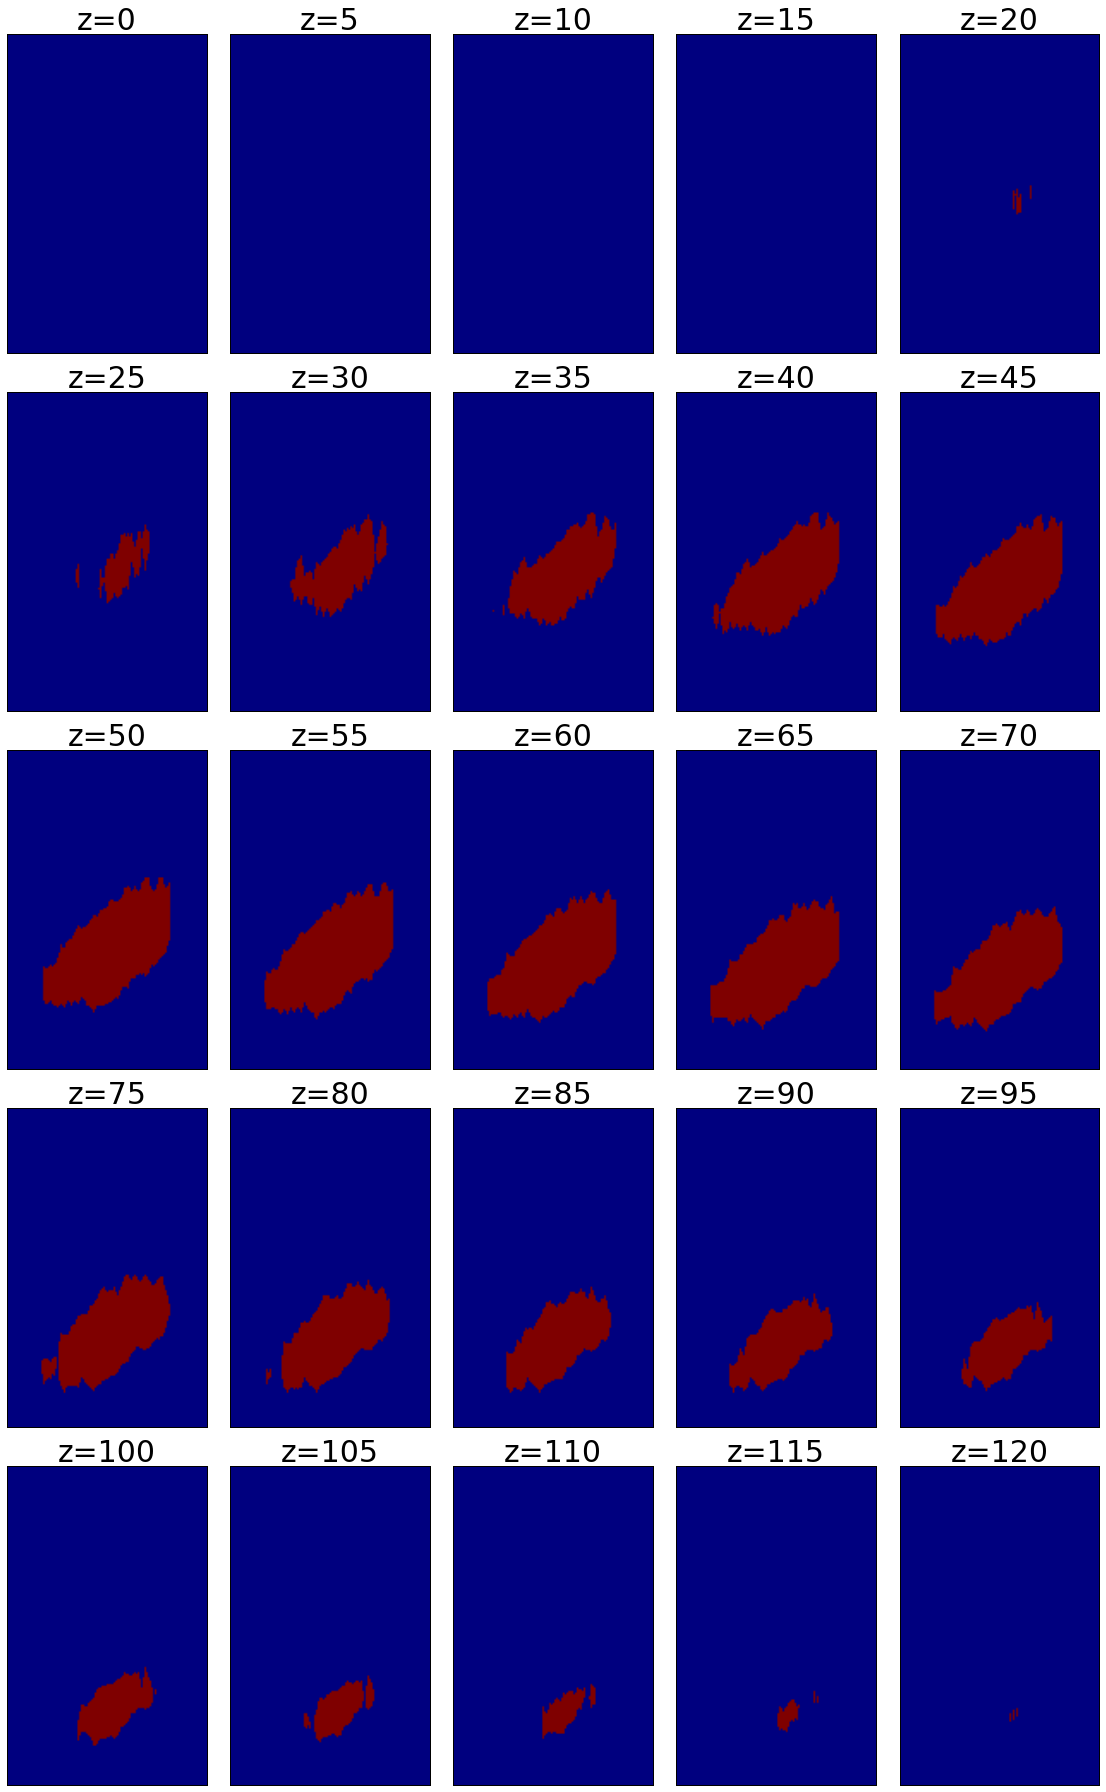

In [19]:
display_volume_sections(volumes['SNR_L'], start_level=0)

In [31]:
volume_per_voxel = XY_PIXEL_DISTANCE_TB ** 3
print 'volume =', np.count_nonzero(volumes['SNR_L']) *  volume_per_voxel / 1e9, "mm^3"

volume = 0.636446794842 mm^3


In [171]:
for s in volumes.keys():
    vol_fp = DataManager.get_score_volume_filepath(stack=stack, structure=s, downscale=32, volume_type='annotationAsScore')
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(volumes[s], vol_fp)
    upload_to_s3(vol_fp)
    
    bbox_fp = DataManager.get_score_volume_bbox_filepath(stack=stack, structure=s, detector_id=None, prep_id=None, downscale=32, volume_type='annotationAsScore')
    create_parent_dir_if_not_exists(bbox_fp)
    np.savetxt(bbox_fp, volume_bbox)
    upload_to_s3(bbox_fp)

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/LM72/LM72_down32_annotationAsScoreVolume/score_volumes/LM72_down32_annotationAsScoreVolume_3N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/LM72/LM72_down32_annotationAsScoreVolume/score_volumes/LM72_down32_annotationAsScoreVolume_3N_L.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/LM72/LM72_down32_annotationAsScoreVolume/score_volumes/LM72_down32_annotationAsScoreVolume_3N_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/LM72/LM72_down32_annotationAsScoreVolume/score_volumes/LM72_down32_annotationAsScoreVolume_3N_L_bbox.txt"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/LM72/LM72_down32_annotationAsScoreVolume/score_volumes/LM72_down32_annotationAsScoreVolume_SNR_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/LM72/LM72_down32_annotationAsScoreVolume/score_volumes/LM72_down32_annotationAsScoreVolume_SNR_L.bp"
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/LM72/LM72_down32_annotationAsScoreVolume/score_volumes

In [172]:
# For lauren's marker data

for name, mkrs in markers_atlasResol.iteritems():
    markers_fp = DataManager.get_lauren_markers_filepath(stack=stack, structure=name)
    create_parent_dir_if_not_exists(markers_fp)
    bp.pack_ndarray_file(markers_atlasResol[name], markers_fp)
    upload_to_s3(markers_fp)

aws s3 cp "/home/yuncong/lauren_data/markers/LM72/LM72_markers_SNR_L.bp" "s3://mousebrainatlas-data/lauren_data/markers/LM72/LM72_markers_SNR_L.bp"
